# Credit Risk Prediction Using Machine Learning

## Project Goal
Build a machine learning model to predict whether a loan applicant will default, using financial and personal data.

---

## Dataset Overview
- Source: Kaggle (credit_risk_dataset.csv)
- Rows: 32,581 | Columns: 12
- Target: `loan_status` (1 = default, 0 = no default)

---

## Models Built
1. **Logistic Regression**
   - Accuracy: 86%
   - Recall (Default): 56%
   - F1 Score (Default): 0.65  
   ✅ Good baseline, but weak recall for defaulters

2. **Random Forest**
   - Accuracy: 93%
   - Recall (Default): 72%
   - F1 Score (Default): 0.83  
   ✅ Strong overall performance

3. **XGBoost**
   - Accuracy: 93%
   - Recall (Default): **75%**
   - F1 Score (Default): **0.83**  
   ✅ Best overall balance of precision + recall

---

##  Feature Importance (XGBoost)
Top features influencing loan default:
- `person_income` (most important)
- `loan_int_rate`
- `loan_percent_income`
- `loan_amnt`
  

These features suggest income and credit history are key predictors of risk, aligning with real-world lending logic.

---

##  Business Value
This model can help:
- Banks assess credit risk before approving loans
- Reduce default rates with better screening
- Optimize interest rates and lending terms for risky profiles

---

##  Final Conclusion
> XGBoost achieved the best performance, identifying 75% of true defaulters while maintaining high precision.  
Feature analysis shows income level is the strongest predictor of loan risk.  
This project demonstrates how machine learning can support real-world financial decision-making.


 Logistic Regression Report
[[7248  365]
 [ 958 1204]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      7613
           1       0.77      0.56      0.65      2162

    accuracy                           0.86      9775
   macro avg       0.83      0.75      0.78      9775
weighted avg       0.86      0.86      0.86      9775


 Random Forest Report
[[7549   64]
 [ 598 1564]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7613
           1       0.96      0.72      0.83      2162

    accuracy                           0.93      9775
   macro avg       0.94      0.86      0.89      9775
weighted avg       0.93      0.93      0.93      9775


 XGBoost Report
[[7526   87]
 [ 551 1611]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7613
           1       0.95      0.75      0.83      2162

    accuracy                    

<Figure size 1000x600 with 0 Axes>

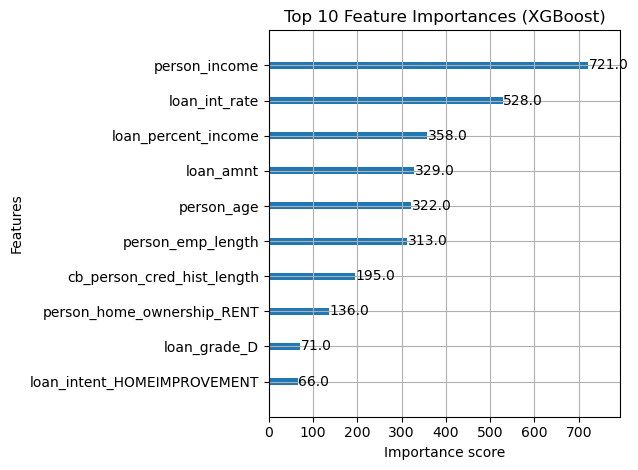

In [4]:
# 1. Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier, plot_importance

# 2. Load dataset
df = pd.read_csv(r'C:\Users\13707\anaconda3\Brandon\credit_risk_dataset.csv')

# 3. Handle missing values
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df['loan_int_rate_missing'] = df['loan_int_rate'].isnull().astype(int)
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].mean())

# 4. Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# 5. Split features and target
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# 6. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 7. Standardize features for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_lr = logreg.predict(X_test_scaled)
print("\n Logistic Regression Report")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# 9. Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\n Random Forest Report")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# 10. XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("\n XGBoost Report")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# 11. Feature importance plot
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10)
plt.title("Top 10 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()

# 12. Final Summary (Markdown-style comment)
# In this project, we built three models to predict loan default:
# Logistic Regression (baseline), Random Forest, and XGBoost.
# XGBoost delivered the best performance overall, with high recall and precision for defaulters.
# Top features included person_income, loan_percent_income, and cb_person_default_on_file.
